#  🚗 Traffic Radars dataset
A usually handheld device that measures the velocity of a moving object by sending out a continuous radio wave and measuring the frequency of reflected waves.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# laptop: "C:/Users/Gebruiker/Documents/Data/ANWB_Data_23_02_2022/trafficRadars - history"
# pc: C:/Users/megin/OneDrive/Documenten/GitHub/AI/Data/ANWB_Data_23_02_2022/trafficRadars - history

In [3]:
plt.style.use('seaborn')

In [4]:
import pyarrow
df = pd.read_parquet('C:/Users/megin/OneDrive/Documenten/GitHub/AI/Data/ANWB_Data_23_02_2022/trafficRadars - history', engine='pyarrow')
df

,radar_id,loaddatetimeutc,road,type,radar_hm,radar_codedirection,radar_loc_lat,radar_loc_lon,radar_from,radar_to,...,segmentstart,segmentend,radar_fromloc_lat,radar_fromloc_lon,radar_toloc_lat,radar_toloc_lon,radar_afrc,radar_category,radar_incidenttype,radar_type
0,540482824,2021-04-15 15:38:00,A1,a,34.7,0,52.21876,5.30799,Amersfoort-West,Baarn,...,Amersfoort,Amsterdam,52.20803,5.36791,52.22059,5.29914,0,radars,radar,a
1,4098093382,2021-04-15 15:38:00,A1,a,7.3,1,52.33550,4.99329,Diemen,knp. Diemen naar de A9 richting Amstelveen,...,Amsterdam,Amersfoort,52.33748,4.98946,52.33343,5.00090,0,radars,radar,a
2,1819580676,2021-04-15 15:38:00,A1,a,9.7,1,52.33134,5.02728,Diemen,Muiden,...,Amsterdam,Amersfoort,52.33748,4.98946,52.32795,5.04860,0,radars,radar,a
3,2955954395,2021-04-15 15:38:00,A1,a,28.6,1,52.23828,5.22834,Hilversum-Noord,knp. Eemnes naar de A27 richting Utrecht,...,Amsterdam,Amersfoort,52.24934,5.21355,52.23106,5.23482,0,radars,radar,a
4,2104992370,2021-04-15 15:38:00,A4,a,243.5,0,51.43317,4.27946,Hoogerheide,de Belgische grens,...,Rotterdam,Antwerpen,51.44157,4.31172,51.37744,4.30396,0,radars,radar,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207360,211118290,2021-01-24 17:19:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,Geleen,Heerlen,50.95573,5.81174,50.93119,5.88359,0,radars,radar,a
207361,211118290,2021-01-24 17:50:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,Geleen,Heerlen,50.95573,5.81174,50.93119,5.88359,0,radars,radar,a
207362,211118290,2021-01-24 17:09:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,Geleen,Heerlen,50.95573,5.81174,50.93119,5.88359,0,radars,radar,a
207363,331169798,2021-01-31 19:24:00,A50,a,161.9,1,51.96946,5.76840,Heteren,Renkum,...,Oss,Arnhem,51.94620,5.76548,51.97489,5.76332,0,radars,radar,a


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207365 entries, 0 to 207364
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   radar_id             207365 non-null  int64         
 1   loaddatetimeutc      207365 non-null  datetime64[ns]
 2   road                 207365 non-null  object        
 3   type                 207365 non-null  object        
 4   radar_hm             207365 non-null  float64       
 5   radar_codedirection  207365 non-null  int32         
 6   radar_loc_lat        207365 non-null  float64       
 7   radar_loc_lon        207365 non-null  float64       
 8   radar_from           207365 non-null  object        
 9   radar_to             207365 non-null  object        
 10  radar_segmentid      207365 non-null  int32         
 11  segmentstart         207365 non-null  object        
 12  segmentend           207365 non-null  object        
 13  radar_fromloc_

# 🧹 Cleaning the dataset

In [6]:
df['weekdayStart'] = pd.to_datetime(df['loaddatetimeutc']).dt.day_name()
df['weekdayEnd'] = pd.to_datetime(df['loaddatetimeutc']).dt.day_name()
df['Month'] = pd.to_datetime(df['loaddatetimeutc']).dt.month_name()
df

,radar_id,loaddatetimeutc,road,type,radar_hm,radar_codedirection,radar_loc_lat,radar_loc_lon,radar_from,radar_to,...,radar_fromloc_lon,radar_toloc_lat,radar_toloc_lon,radar_afrc,radar_category,radar_incidenttype,radar_type,weekdayStart,weekdayEnd,Month
0,540482824,2021-04-15 15:38:00,A1,a,34.7,0,52.21876,5.30799,Amersfoort-West,Baarn,...,5.36791,52.22059,5.29914,0,radars,radar,a,Thursday,Thursday,April
1,4098093382,2021-04-15 15:38:00,A1,a,7.3,1,52.33550,4.99329,Diemen,knp. Diemen naar de A9 richting Amstelveen,...,4.98946,52.33343,5.00090,0,radars,radar,a,Thursday,Thursday,April
2,1819580676,2021-04-15 15:38:00,A1,a,9.7,1,52.33134,5.02728,Diemen,Muiden,...,4.98946,52.32795,5.04860,0,radars,radar,a,Thursday,Thursday,April
3,2955954395,2021-04-15 15:38:00,A1,a,28.6,1,52.23828,5.22834,Hilversum-Noord,knp. Eemnes naar de A27 richting Utrecht,...,5.21355,52.23106,5.23482,0,radars,radar,a,Thursday,Thursday,April
4,2104992370,2021-04-15 15:38:00,A4,a,243.5,0,51.43317,4.27946,Hoogerheide,de Belgische grens,...,4.31172,51.37744,4.30396,0,radars,radar,a,Thursday,Thursday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207360,211118290,2021-01-24 17:19:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,5.81174,50.93119,5.88359,0,radars,radar,a,Sunday,Sunday,January
207361,211118290,2021-01-24 17:50:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,5.81174,50.93119,5.88359,0,radars,radar,a,Sunday,Sunday,January
207362,211118290,2021-01-24 17:09:00,A76,a,7.8,1,50.94323,5.84812,Geleen,Nuth,...,5.81174,50.93119,5.88359,0,radars,radar,a,Sunday,Sunday,January
207363,331169798,2021-01-31 19:24:00,A50,a,161.9,1,51.96946,5.76840,Heteren,Renkum,...,5.76548,51.97489,5.76332,0,radars,radar,a,Sunday,Sunday,January


ordering the months from jan-dec for better overview


In [7]:
#first I replace the full name of the month "February" to "feb" for easier readability
df['Month'] = df['Month'].map({'February': 'Feb', 'June':'Jun', 'May':'May', 'September':'Sep', 'July':'Jul', 'April':'Apr', 'August':'Aug', 'December':'Dec', 'March':'Mar', 'October':'Oct', 'November':'Nov', 'January':'Jan'})

In [17]:
# We create a variable with the order of the months we want
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [14]:
# we sort the column month on the variable months
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

Do the same thing for days

In [16]:
# Defining the order of the days of the week
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]

In [18]:
df['weekdayStart'] = pd.Categorical(df['weekdayStart'], categories=day, ordered=True)

In [8]:
df.radar_category.unique()

array(['radars'], dtype=object)

In [9]:
df.radar_incidenttype.unique()

array(['radar'], dtype=object)

💬 The below plot shows the amount of dataentries for each road. This one clearly shows us that A2 has the most traffic radar entries.

<AxesSubplot:xlabel='count', ylabel='road'>

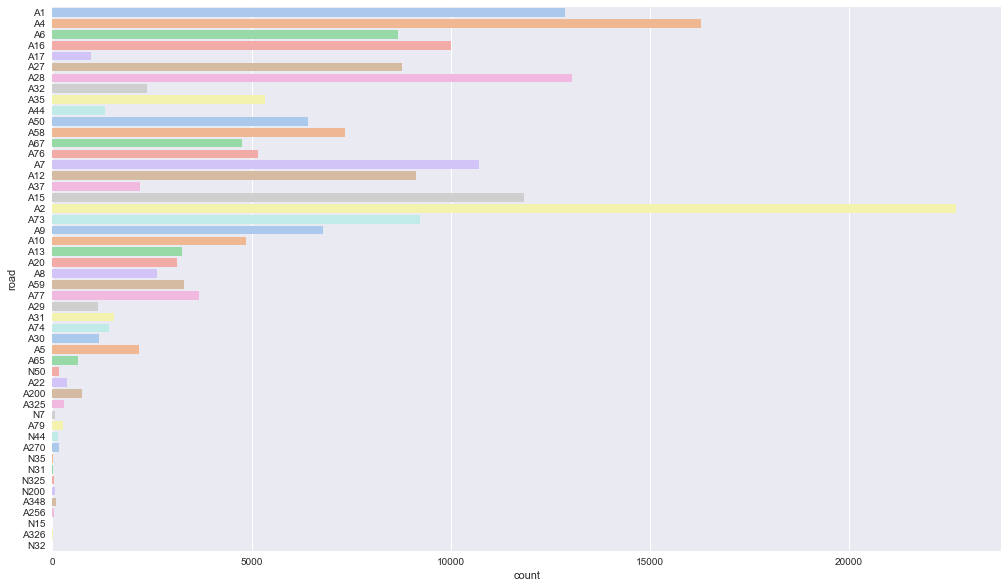

In [6]:
plt.figure(figsize=(17,10))
sns.countplot(y="road", data=df,
            palette="pastel")

<Figure size 576x396 with 0 Axes>

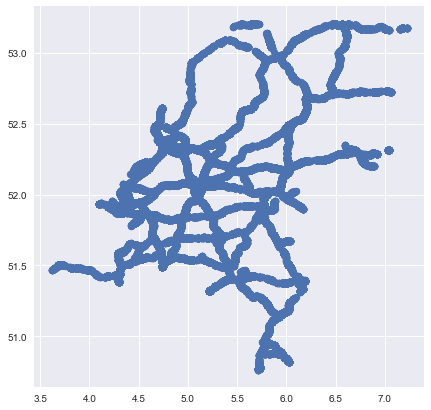

In [7]:
plt.figure();
plt.figure(figsize=[7,7]);
## latitude and longtitude
x = df[['radar_loc_lat']]
y = df[['radar_loc_lon']]

plt.scatter(y, x)

<AxesSubplot:xlabel='weekdayStart', ylabel='count'>

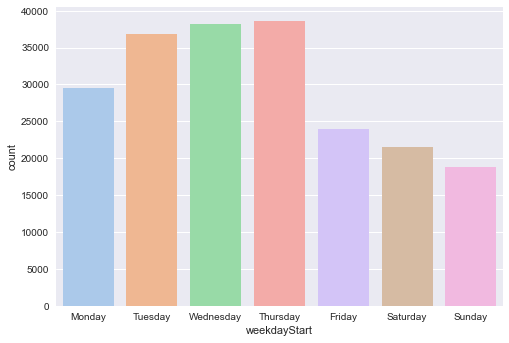

In [19]:
sns.countplot(x="weekdayStart", data=df,
            palette="pastel")

<AxesSubplot:xlabel='Month', ylabel='count'>

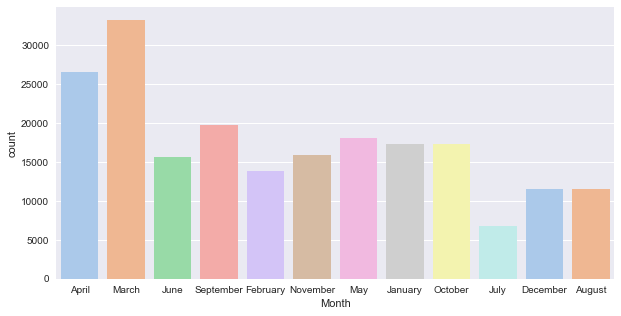

In [11]:
plt.figure(figsize=(10,5))

sns.countplot(x="Month", data=df,
            palette="pastel")

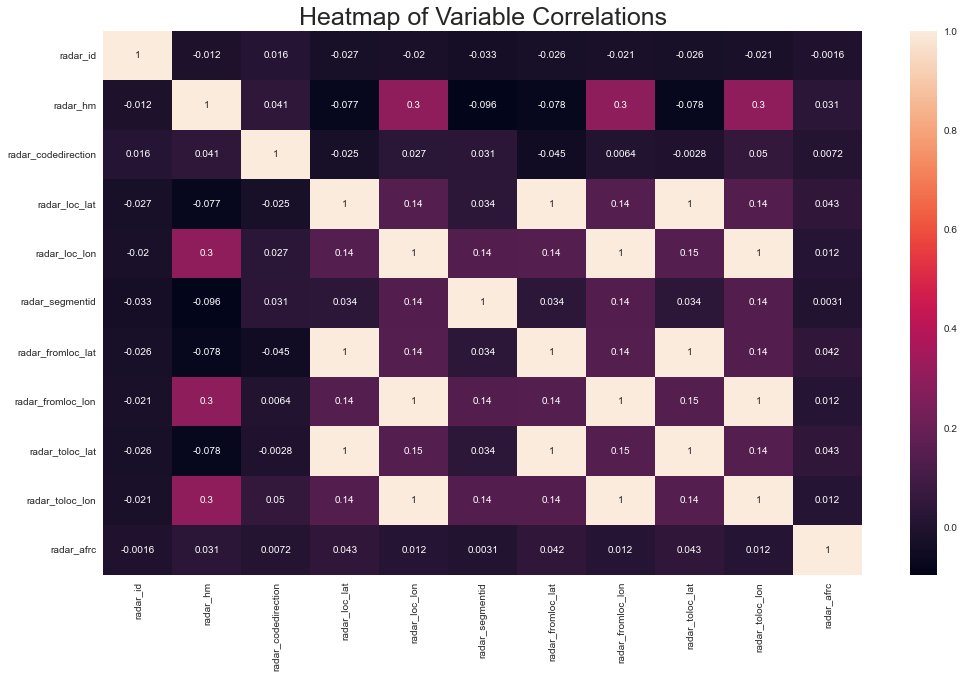

In [20]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()